In [116]:
# Importing libraries needed through the project:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gather DATA:

In [117]:
# Loading the three datasets for data wrangling: 
twitter_archive_enhanced = pd.DataFrame(pd.read_csv('twitter-archive-enhanced.csv'))

image_predictions = pd.DataFrame(pd.read_csv('image-predictions.tsv', sep='\t'))


In [118]:
# Look at the summary of the twitter_archive_enhanced columns:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [119]:
# check the head dataset of the twitter_archive_enhanced columns:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [120]:
# check the tail dataset of the twitter_archive_enhanced columns:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [121]:
#Check how many values in each column has a NULL value:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [122]:
# Check ids for status tweets is it empty or not:
print('retweeted_status_id (Not Null):',twitter_archive_enhanced.retweeted_status_id.notnull().sum())
print('in_reply_to_status_id (Not Null):',twitter_archive_enhanced.in_reply_to_status_id.notnull().sum())

retweeted_status_id (Not Null): 181
in_reply_to_status_id (Not Null): 78


In [123]:
# Look at closest column might be impacted for assessing:
twitter_archive_enhanced.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [124]:
# Looping over columns to check the counts value inside it:
for i in ('rating_numerator', 'rating_denominator','source','doggo', 'floofer', 'pupper', 'puppo'):
    print('------------------------------------------')
    print(twitter_archive_enhanced[i].value_counts())

------------------------------------------
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
------------------------------------------
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64
------------------------------------------
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href

In [125]:
# Print all conditions might be impacted through our processes:
print('rating_denominator not equal to 10 is:',
      twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] != 10].rating_denominator.count())
print('rating_numerator less than or a highly far away from 10 is:',
      twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] < 10].rating_numerator.count())
print('rating_numerator a highly far away from 10 is:',
      twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 20].rating_numerator.count())

rating_denominator not equal to 10 is: 23
rating_numerator less than or a highly far away from 10 is: 440
rating_numerator a highly far away from 10 is: 24


# 1- Assessing Data:

### Assessing `twitter_archive_enhanced` Data:

#### Quality Issues:
1- There are ratings at rating_denominator are not equal to 10, and this not accurate data:
Action: Those rows will be removed.

2- There are ratings at rating_numerator are less than 10, and this not accurate data:
Action: Those rows will be removed.

3- There are ratings at rating_numerator a highly greater than 10 with approx: `> 20` , and this not accurate data:
Action: Those rows will be removed.

4- Remove column rating_denominator after removing the outliers, as the column will have one unique value is 10
Action: Column will be removed.


#### Tidiness Issues:
1- There are `181` rows in retweeted_status_id for retweets as not each row to represent unique data.

2- There are `78` rows in in_reply_to_status_id for retweets as not each row to represent unique data.

In [126]:
# Look at the summary of the image_predictions columns:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [127]:
# check the head dataset of the image_predictions columns:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [128]:
# check the tail dataset of the image_predictions columns:
image_predictions.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [129]:
#Check how many values in each column has a NULL values:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [130]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Assessing `image_predictions` Data:

#### Quality Issues:
1- There are `543` values for p1_dog are FALSE and 1_prediction is a breed of dog must be `TRUE`
Action: Those rows will be removed.

2- Column p1_dog will be removed after removing the FALSE rows, as the column will have a unique value as `TRUE`.
Action: Column will be removed.

3- p2 & p3 Not needed for analysis as will work only on p_1, then it has to be removed for sizing:
Action: will remove p2 & p3 columns

4- p1 and p1_conf column names not clear, so it has to be renamed for better communications:
Action: Rename column names for better understanding

In [131]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [132]:
# Look at the summary of the tweets columns:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [133]:
# check the head dataset of the tweets columns:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [134]:
# check the tail dataset of the tweets columns:
tweets.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [135]:
# describe the summary of tweets dataset for whole columns:
tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [136]:
# check if there any null values at tweets datasets:
tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

# 2- Cleaning Data:

In [137]:
twitter_archive_copy = twitter_archive_enhanced.copy()

In [138]:
## Qulaity Issues:
# 1- Removing the rows that have a rating_denominator are not equal to 10
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.rating_denominator != 10].index, inplace = True)
twitter_archive_copy.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [139]:
## Qulaity Issues:
# 2- Removing the rows that has a rating_numerator less than 10:
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.rating_numerator < 10].index, inplace = True)
twitter_archive_copy.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

In [140]:
## Qulaity Issues:
# 3- Removing the rows that has a rating_numerator a highly greater than 10 with approx: `> 20`:
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.rating_numerator > 20].index, inplace = True)
twitter_archive_copy.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
14     54
15      2
17      1
Name: rating_numerator, dtype: int64

In [141]:
## Qulaity Issues:
# 4- Remove column rating_denominator after remvoving the outliers, as the column will have a one unique value is 10:
twitter_archive_copy.drop(columns = 'rating_denominator', inplace = True)
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,None,None,None


In [142]:
## Tidiness Issues:
# 1- There are `181` rows in retweeted_status_id for retweets as not each row to represent a unique data.
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.retweeted_status_id.notnull()].index, inplace = True)
twitter_archive_copy.retweeted_status_id.notnull().sum()

0

In [143]:
## Tidiness Issues:
# 2- There are `78` rows in in_reply_to_status_id for retweets as not each row to represent a unique data.
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.notnull()].index, inplace = True)
twitter_archive_copy.in_reply_to_status_id.notnull().sum()

0

### Cleaning `image_predictions` Data:

In [144]:
image_predictions_copy = image_predictions.copy()

In [145]:
## Quality Issues:
#1- There are `543` values for p1_dog are FALSE and 1_prediction is a breed of dog must be `TRUE`
image_predictions_copy.drop(image_predictions_copy[image_predictions_copy.p1_dog == False].index, inplace=True)
image_predictions_copy.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [146]:
## Quality Issues:
#2- Column p1_dog will be removed after removing the FALSE rows, as the column will has a unique value as `TRUE`.
image_predictions_copy.drop(columns = 'p1_dog', inplace=True)

In [147]:
## Quality Issues:
# 3- p2 & p3 Not needed for analysis as will work only on p_1, then it have to be removed for sizing:
image_predictions_copy.drop(columns = 'p2', inplace=True)
image_predictions_copy.drop(columns = 'p3', inplace=True)

In [148]:
## Quality Issues:
# 4- p1 and p1_conf column names not clear, so it have to be renamed for better communications:
image_predictions_copy.rename(columns = {'p1':'dog_confident', 'p1_conf':'dog_confident_prediction'}
, inplace=True)

### Merging Datasets:

In [149]:
## Merging the three datasets into one dataframe to start analysis:
tweets_copy = tweets.copy()
Tweets_final = pd.DataFrame(pd.merge(twitter_archive_copy, image_predictions_copy,how='left', left_on = 'tweet_id', right_on = 'tweet_id'))
Tweets_final = pd.DataFrame(pd.merge(Tweets_final, tweets_copy, how='inner', left_on = 'tweet_id', right_on = 'tweet_id'))
Tweets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 1659
Data columns (total 26 columns):
tweet_id                      1660 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1660 non-null object
source                        1660 non-null object
text                          1660 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1657 non-null object
rating_numerator              1660 non-null int64
name                          1660 non-null object
doggo                         1660 non-null object
floofer                       1660 non-null object
pupper                        1660 non-null object
puppo                         1660 non-null object
jpg_url                       1228 non-null object
img_num                       1228 non-

In [150]:
#Cleaning Final_data:
# - As (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp)
# has null data, it have to be removed for data cleanings:

col_drops = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
Tweets_final.drop(col_drops, inplace=True, axis=1)

### Saving the four datasets to a csv files:

In [151]:
# Saving datasets to csv:
Tweets_final.to_csv('twitter_archive_master.csv')
twitter_archive_copy.to_csv('twitter_archive_copy_clean.csv')
image_predictions_copy.to_csv('image_predictions_copy_clean.csv')
tweets_copy.to_csv('tweets_copy_clean.csv')

## Analysis and visualizations:

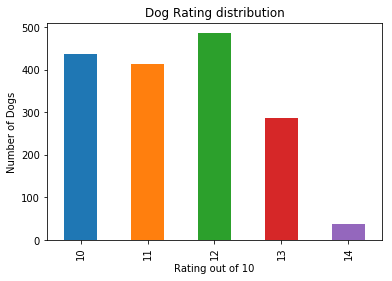

In [152]:
# Plot dog rating distribution across the ratings with the number of dogs:
rating_numerator_plot = Tweets_final.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
rating_numerator_plot.set_xlabel("Rating out of 10")
rating_numerator_plot.set_ylabel("Number of Dogs")
plt.savefig('Highest Ratings amoung the dogs')

In [153]:
Tweets_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,...,jpg_url,img_num,dog_confident,dog_confident_prediction,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,0.090647,True,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,0.078253,True,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,0.225770,True,0.175219,True,9774,41048


#### Highest 3 rating categories of dogs has a rating `12` with follow with `10` and back to `11`.

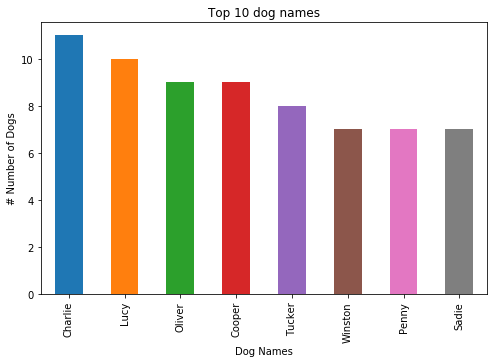

In [154]:
Top10_dog_names = Tweets_final.name.value_counts()[2:10].plot('bar', figsize=(8,5), title='Top 10 dog names')
Top10_dog_names.set_ylabel("# Number of Dogs")
Top10_dog_names.set_xlabel("Dog Names")
plt.savefig('TOP10_dog_names')

#### Most common names for dogs are [Charlie, Lucy and Oliver]

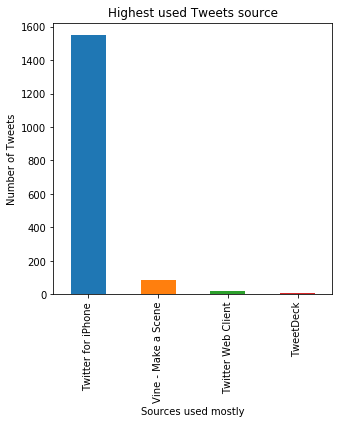

In [155]:
# Look at which sources are used significantly:
Tweets_final.source = Tweets_final.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

Most_sources = Tweets_final['source'].value_counts().plot('bar', figsize=(5,5), title='Highest used Tweets source')
Most_sources.set_xlabel("Sources used mostly")
Most_sources.set_ylabel("Number of Tweets")
plt.savefig('twitter_source')

#### Signifcaintly `(Twitter for iphone)` has the highest number of tweets

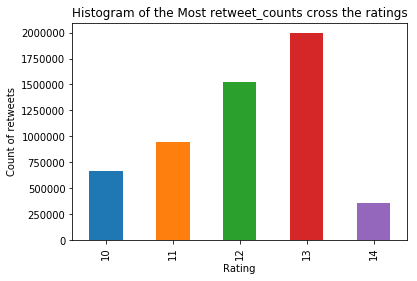

In [156]:
dog_type_plot = Tweets_final.groupby('rating_numerator')

dog_type_plot['retweet_count'].sum().plot(kind = 'bar')
plt.title('Histogram of the Most retweet_counts cross the ratings')
plt.xlabel('Rating')
plt.ylabel('Count of retweets')

dog_type_plot_pic = plt.gcf()
dog_type_plot_pic.savefig('dog_type_plot_pic.png',bbox_inches='tight');

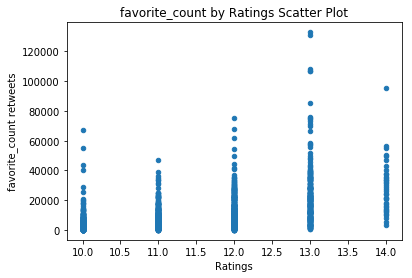

In [157]:
favorite_count_distr = Tweets_final.plot(x='rating_numerator', y='favorite_count', kind='scatter')
plt.xlabel('Ratings')
plt.ylabel('favorite_count retweets')
plt.title('favorite_count by Ratings Scatter Plot')

favorite_count_distr = plt.gcf()
favorite_count_distr.savefig('favorite_count_distr.png',bbox_inches='tight');